***

# Calcul Matriciel
## TP2. Graphs isomorphism for dummies
***
***

Basics on graph isomorphism and graph info via adjacency matrices
***
***
A few ground rules for your report:
* _your code must be clear, commented and use explicit variable names_
* _every algorithm must be tested on a few examples which show the different use cases_
* _markdown comments and examples must be provided, and the report should be self-contained_

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

**_In this pratical, we will only deal with non-oriented graphs. It can be however interesting to notice what would work or fail in the oriented setting_**


The aim of this practical is to extract from theadjacency matrix basic infos (order,size,degrees,radius,diameter, ...).


***
## <font color=blue>Some adjacency matrices examples and function already defined</font> ##
***

**To Do:**

**_question 1_**

Create (again) a numpy array `B` representing the adjacency matrix of the Bull graph (cf CM1 and TP1).


Copy the function  `complet(n)` returning the adjacency matrix of the complete graph on $n$ vertices and  ` wheel(n)` returning the adjacency matrix of the wheel graph on $n+1$ vertices from TP1 

In [3]:
def complete(n):
    """
     Returns the adjacency matrix of a complete graph with n vertices

    :param n: nomber of vertices
    :type n:  int
    :return: adjacency matrix of a complete graph with n vertices
    :rtype: 2D numpy array of int
    """
    A=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i!=j:
                A[i,j]=1  
    
    return A

B=np.array([[0,1,0,0,0],[1,0,1,1,0],[0,1,0,1,0],[0,1,1,0,1],[0,0,0,1,0]])
print(B)
print(complete(6))

[[0 1 0 0 0]
 [1 0 1 1 0]
 [0 1 0 1 0]
 [0 1 1 0 1]
 [0 0 0 1 0]]
[[0. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0.]]


**_question 2_**

Copy the function `̀Info` from TP1

In [4]:
def info(A):
    """
    Return some informations about an adjacency matrix.

    :param A: the adjacency matrix
    :type A: a matrix (two dimensionnal array) containing only integers
    :return: the number of vertices (int), the number of edges (int) and a list of degree (table of int)
    :rtype: int, int, table of int
    """
    vertNum=A.shape[0],
    arcNum=np.dot(A,np.ones((A.shape[0],1)))
    degList=arcNum.size/2
    return [vertNum,arcNum,degList]


***
## <font color=blue>Excentricity, radius, diameter</font> ##
***

We recall that, if $A$ is the adjacency matrix of a graph $G$, then $A_{i,j} = \mathbf{e_j}^TA^\ell\mathbf{e_i}$ is number of path of length exactly $\ell$ between $i$ and $j$.

**To Do:**

**_question 1_**

How do you know if there is a path of length <u>a most $\ell$</u> in G?

 <!-- if (A)^k^~ij~>0, there is a path -->

Deduce a function computing the excentricity of a node $s \in G$.

In [9]:
def excentricity(A):
    """
    Return some informations about an adjacency matrix.

    :param A: the adjacency matrix
    :type A: a matrix (two dimensionnal array) containing only integers
    :return: the list of excentricities (list of int), the diameted (int) and the radius (int)
    :rtype: array of int,int, int,
    """
    k=1
    ex=np.zeros(A.shape[0])
    C=np.identity(A.shape[0])+A
    while True :
        for i in range(C.shape[0]):
            if not C[i].__contains__(0) and ex[i]==0:
                ex[i]=k
        k+=1
        if not C.__contains__(0):
            break
        C+=np.linalg.matrix_power(A,k)

    return [ex,ex.max(),ex.min()]

excentricity(B)
    

[array([3., 2., 2., 2., 3.]), 3.0, 2.0]

**_question 1 bis_**

What happens if a graph is not connected? Fix this issue.

**To Do:**
In this question, we start by assuming that the graph is _**directed**_.


**_question 2 preliminaries_**

Create the adjacency matrix of the digraph of CM1 slide 11. 

**_question 2_**

In this setting, write a function computing the size of the shortest cycle a node $s$ belongs to. 

In [115]:
Dig=np.array([[0]])


def girth(A):
    """
    Return the girth of a digraph

    :param A: the adjacency matrix
    :type A: a matrix (two dimensionnal array) containing only integers
    :return: the girth (int)
    :rtype: int
    """
    
    return -1


1
2
3


[array([2, 3, 3, 3, 1]), 1]

**_question 2 bis_**

What happens if a graph is not connected? Fix this issue.

**question 3**
Does your algorithm work for undirected graphs? Give a counterexample

**question bonus**
Show that we can compute the girth $\pm 1$ of an undirected graph using this method. _hint: what happens for cycles of even/odd lengths?_

__________________________


***
## <font color=blue>Computing isomorphisms</font> ##
***
In this part, we are going to compute ((very) naively) whether 2 graphs are isomorphic.


In order to do so, we are going to apply the (extremely) naive algorithm


<tt> areIsomorphicGraph(A,B)
    
for all permutations p
    
    if p(A) = B
    
       return True
    
return False
</tt>


It is easy to implement the permutation for a matrix: given a permutation $\sigma \in S_n, (P_\sigma)_{i,j} = \begin{cases}1 \text{ if } \sigma(j) = i \\ 0 \text{ otherwise }\end{cases} $.

Then $\sigma(A) = P.A.A^{-1}$


see also https://en.wikipedia.org/wiki/Permutation_matrix

**To Do:**

**_question 1 preliminaries_**

Get familiar with permutations and itertools

In [116]:
from itertools import permutations

perm = list(permutations(np.arange(5)))

perm[0]


(0, 1, 2, 3, 4)

**_question 1_**


Given a permutation $\sigma \in S_n$, compute the associated permutation matrix $P_\sigma$

In [117]:
def permMat(sigma):

    P=np.zeros((1,1),int)

            
    return P

permMat(perm[1])

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

*****
**To Do:**


**_question 2 preliminaries_**

Create a few examples of isomorphic and non isomorphic graphs (adjacency matrices).

Share them with your classmates


*****
**To Do:**


**_question 2_**

Write down the naive algorithm described above

In [118]:
def areIsomorphicGraph(A,B):
    """

    """    
    
    return False

areIsomorphicGraph(A,A)

(0, 1, 2, 3, 4)

_**question 2 bis**_

What is the complexity of this algorithm?

_______________________



***
## <font color=blue>Generating and counting graphs</font> ##
***

The aim of this last part is to create tools to test our isomorphism algorithms.


One possible way of generating all graphs of size $n$ is to add a vertex in all possible ways from all graphs of size $n-1$.

**_question 1_**

Write a function generating all (undirected, simple) graphs.


Draw theses graphs for $n\leq 4$

_(hint): counting in binary might come handy_

In [119]:


def allGraphs(n):
    """
    generates all graphs of order n
    """

    graphs=[]

    return graphs



allGraphs(4)[1]

[0 0 0 1]


array([[0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.]])

................................................................

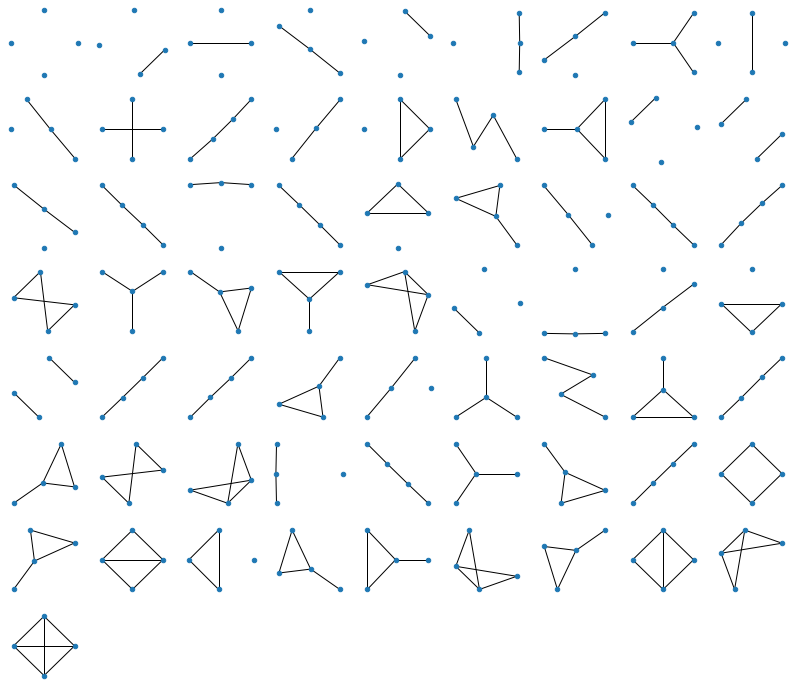

**_question bonus_**

Write a function generating all (undirected, simple) graphs by deleting (in a clever order) edges from the complete graph 

**_question 2_**

Write a (still naive) function generating all (undirected, simple) non-isomorphic graphs.

_(hint) the number of non-isomorphic undirected simple graph is given by https://oeis.org/A000088. See also https://networkx.org/documentation/stable/reference/generated/networkx.generators.atlas.graph_atlas_g.html#networkx.generators.atlas.graph_atlas_g




In [126]:
def allNonIsoGraphs(n):

    
    nonIso=[]
    

            
    return nonIso


len(allNonIsoGraphs(5))

34

....

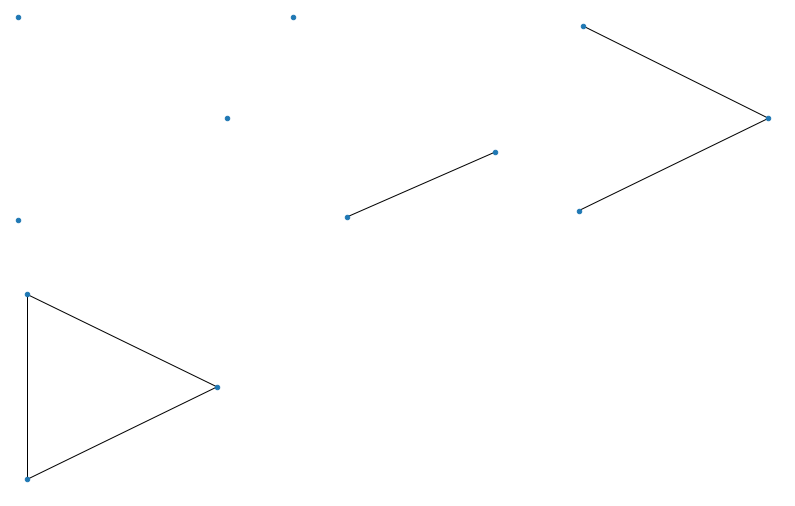

In [124]:
plot_graphs(allNonIsoGraphs(3))

**_question bonus_**
Evaluate the performances of your algorithm.
